<a href="https://colab.research.google.com/github/Akilu-phat/SCM_8/blob/main/SCM_8_final_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))



In [ ]:
!pip install mpl-finance

In [ ]:
!pip install arch

     |████████████████████████████████| 798kB 2.8MB/s 


In [ ]:
!pip install  yfinance

     |████████████████████████████████| 5.5MB 3.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=81485783ae870a4c9502b4d843e4b810ebb702cb8078bba2f1fc487c167ea792
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install quandl

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web

import yfinance as yf

In [ ]:
mtn = yf.download('MTN',
                  start = '2006-06-30',
                  end='2020-10-3',
                  progress = False)

Jifeng = yf.download('600616.SS',
                  start = '2006-06-30',
                  end='2020-10-3',
                  progress = False)

In [ ]:
#viewing mtn dataframe
mtn.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-06-30,36.200001,37.099998,36.049999,37.099998,30.398458,755900
2006-07-03,37.049999,37.150002,36.770000,37.000000,30.316528,164200
2006-07-05,36.930000,36.970001,36.119999,36.259998,29.710184,185600
2006-07-06,36.290001,36.410000,36.200001,36.349998,29.783924,155000
2006-07-07,36.220001,36.220001,35.369999,35.450001,29.046509,356800


In [ ]:
#viewing jifeng dataframe
Jifeng.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-06-30,10.17950,10.17950,9.81410,10.07690,8.897742,4536194
2006-07-03,9.92949,10.00000,9.67949,9.85256,8.699651,6530715
2006-07-04,9.83974,9.96154,9.61538,9.65385,8.524195,8103962
2006-07-05,9.61538,9.64744,9.01923,9.23077,8.150622,9460688
2006-07-06,9.22436,9.40385,9.11538,9.32051,8.229862,9436396


In [ ]:
#mtn data frame descriptive statistics
mtn.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3.590000e+03
mean,104.984415,106.249981,103.698841,104.994861,95.669072,3.363535e+05
std,76.955390,77.721595,76.164999,76.929716,75.703295,2.391296e+05
min,15.250000,16.080000,14.760000,14.800000,12.126607,3.540000e+04
25%,44.200001,44.902501,43.502500,44.279999,36.404659,1.922500e+05
50%,66.494999,67.240002,65.974998,66.445000,56.861877,2.771500e+05
75%,165.965000,169.777496,163.532501,166.862495,159.112286,4.042500e+05
max,298.950012,302.760010,296.809998,301.420013,284.857513,3.219400e+06


In [ ]:
# JIfeng dataframe descriptive statistics
Jifeng.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3473.000000,3473.000000,3473.000000,3473.000000,3473.000000,3.473000e+03
mean,8.535370,8.711044,8.372236,8.546128,7.959184,9.266162e+06
std,3.556526,3.651931,3.459879,3.556710,3.075555,8.231778e+06
min,3.130770,3.292310,3.130770,3.238460,3.219353,0.000000e+00
25%,6.400000,6.500000,6.300000,6.392310,6.079314,3.914303e+06
50%,8.044870,8.169230,7.907690,8.061540,7.572840,6.705148e+06
75%,9.846150,10.038500,9.679490,9.853850,9.140792,1.192121e+07
max,23.352600,23.352600,21.955099,22.423100,19.959593,7.675498e+07


Populating the interactive namespace from numpy and matplotlib


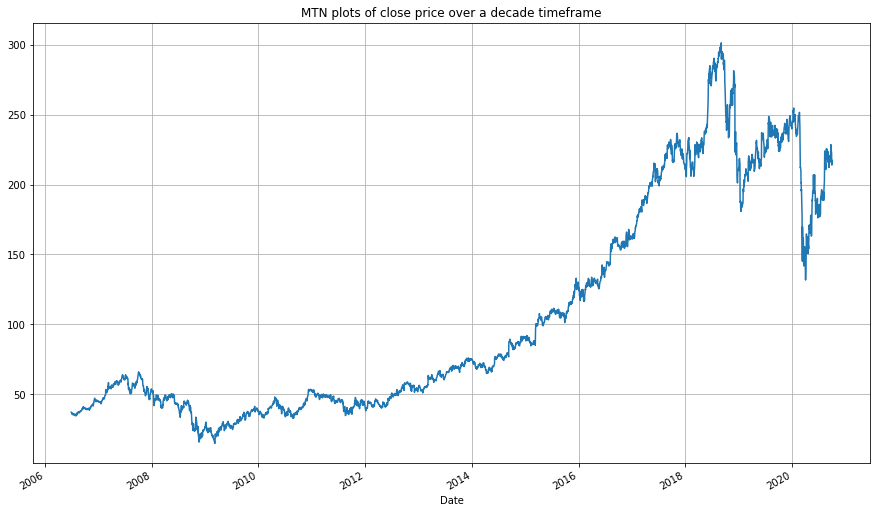

In [ ]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
mtn['Close'].plot(title='MTN plots of close price over a decade timeframe', grid = True) # Plot the adjusted closing price of AAPL


Populating the interactive namespace from numpy and matplotlib


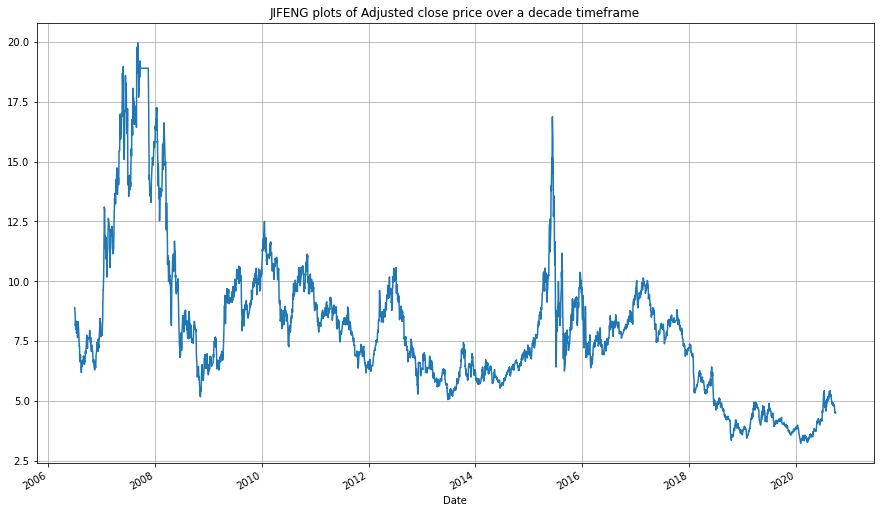

In [ ]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
Jifeng['Adj Close'].plot(title='JIFENG plots of Adjusted close price over a decade timeframe',grid = True) # Plot the adjusted closing price of JIFENG


Even though the plots above give a fair idea of the dynamics of price action we are limited as not all the features of our dataset is included in the plot above, we thusly hope for a graph that incorporate the Open, High, Low and Close features of our datasets and no plots does this better than the candlestick plot. Below is the candlestick plot of MTN and JIFENG over the past decade
# Candle stick plot of our stock price over the past decade

---



CandleStIck Plot of MTN over the past decade


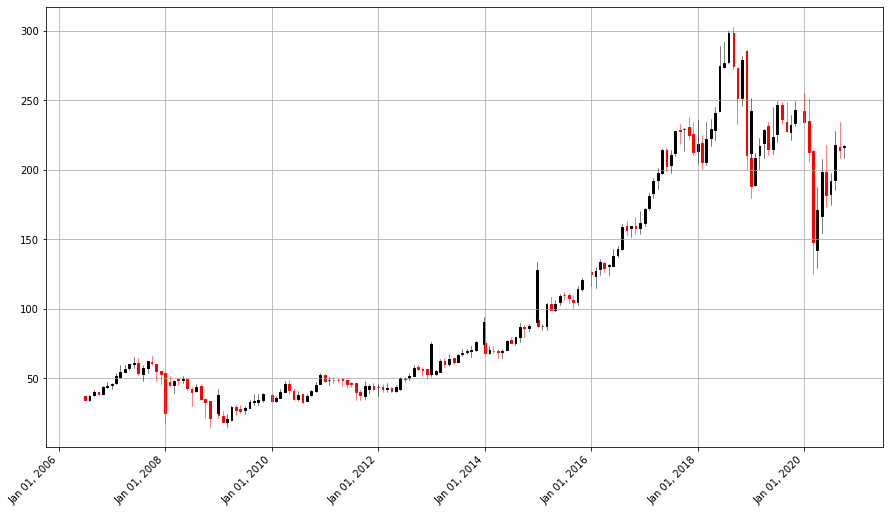

In [ ]:
print('CandleStIck Plot of MTN over the past decade')

from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", adj = False, otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param adj: A boolean indicating whether to use adjusted prices
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    fields = ["Open", "High", "Low", "Close"]
    
    transdat = dat.loc[:,fields]
    transdat.columns = pd.Index(["Open", "High", "Low", "Close"])
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(mtn, adj=True, stick="month",)


CandleStIck Plot of MTN over the past decade


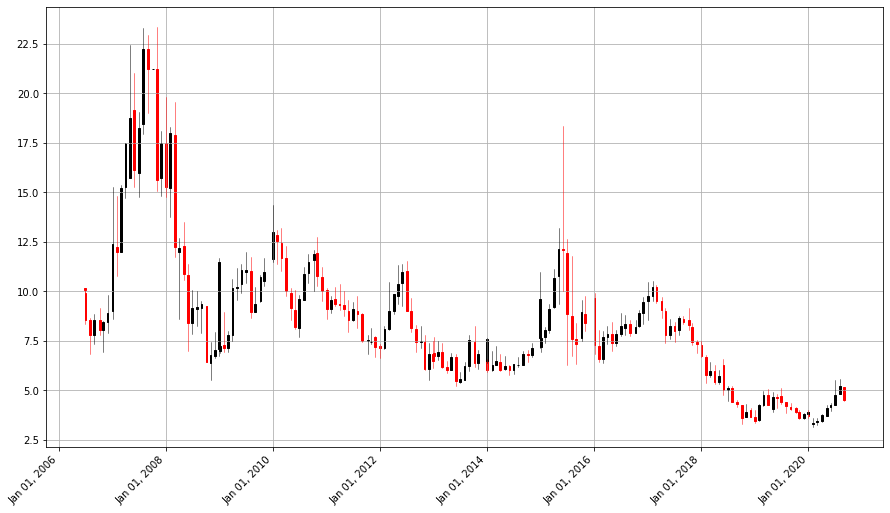

In [ ]:
print('CandleStIck Plot of MTN over the past decade')
pandas_candlestick_ohlc(Jifeng, adj=True, stick="month",)

# Stationarity and Normality in financial Data

What stationary means is that the statistics of the underlying signals are stable over time, leaving aside comprehensive mathematical description. 
Stationary, though, is a major problem in the field of finance. For example , consider the price signal in the figure below for MTN and JIFENG. A robust statistical test is not required to ensure that the average price does not stay constant over time.

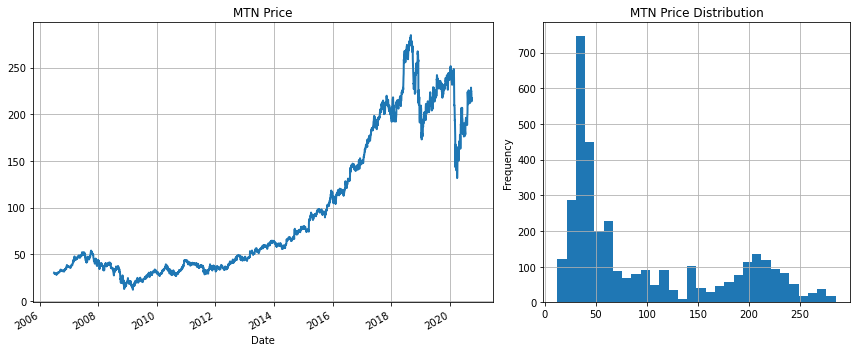

In [ ]:
subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1], )
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
mtn["Adj Close"].plot(title='MTN Price', ax=ax[0], grid=True, linewidth=2)
mtn["Adj Close"].plot.hist(title='MTN Price Distribution', ax=ax[1], grid=True, bins=30)
plt.tight_layout()
plt.savefig('tmp.png')

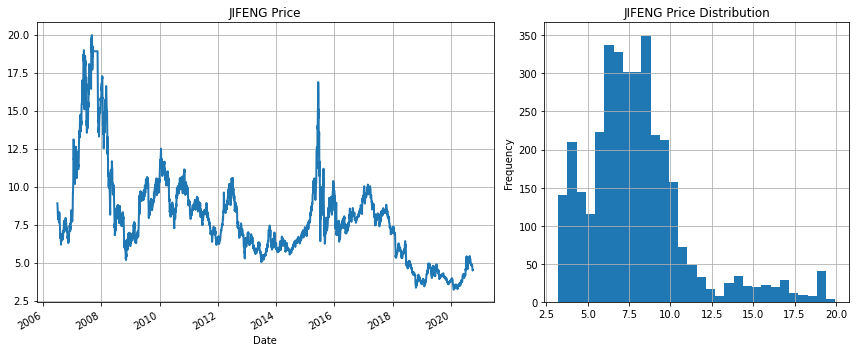

In [ ]:
subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1])
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
Jifeng["Adj Close"].plot(title='JIFENG Price', ax=ax[0], grid=True, linewidth=2)
Jifeng["Adj Close"].plot.hist(title='JIFENG Price Distribution', ax=ax[1], grid=True, bins=30)
plt.tight_layout()
plt.savefig('tmp.png')

# LOG RETURNs
Log returns are a statistical method that seeks to differentiates between log valuesat time t-1 and t, which is why it is often referred to as log-Differencing.

$$r_t = log\frac{p_t}{P_{t-1}} = log(p_t) - log(p_{t-1})$$

The aim of bthis process is to generate stationary signals suitable for Machine learning and othe classical statistics. Evidence of stationarity of the log returns is seen from the return plots OF MTN and JIFENG bvelow, one could see thatr our Returns plot has a conmtant mean around zero and a more constant zero

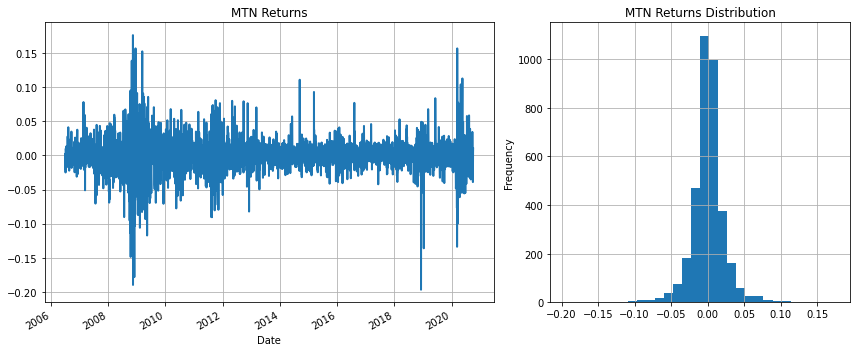

In [ ]:
rs_mtn = mtn["Adj Close"].apply(np.log).diff(1)

subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1])
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
rs_mtn.plot(title='MTN Returns', ax=ax[0], grid=True, linewidth=2)
rs_mtn.plot.hist(title='MTN Returns Distribution', ax=ax[1], grid=True, bins=30)
plt.tight_layout()
plt.savefig('tmp.png')

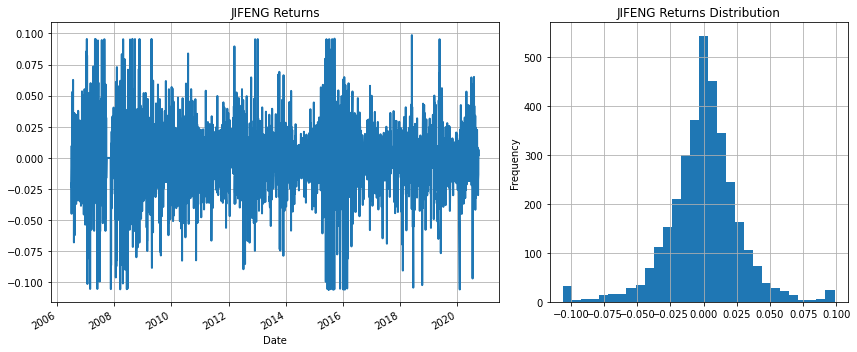

In [ ]:
rs_Jfng = Jifeng["Adj Close"].apply(np.log).diff(1)

subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1])
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
rs_Jfng.plot(title='JIFENG Returns', ax=ax[0], grid=True, linewidth=2)
rs_Jfng.plot.hist(title='JIFENG Returns Distribution', ax=ax[1], grid=True, bins=30)
plt.tight_layout()
plt.savefig('tmp.png')

# __ROLLING STATISTICS FOR OUR RETURNS__
We have shown that log returns, with some indications of stationarity, obey classic normal distributions. By looking at the rolling statistics of our returns over a short-term window,we wish tro have a deeper dive into the market insights.from the both plots below we can clearly see the staionarity  displayed by the moving average, volatility, skew and kurtosis. this confirms our level of confidence in the stationarity of both returns


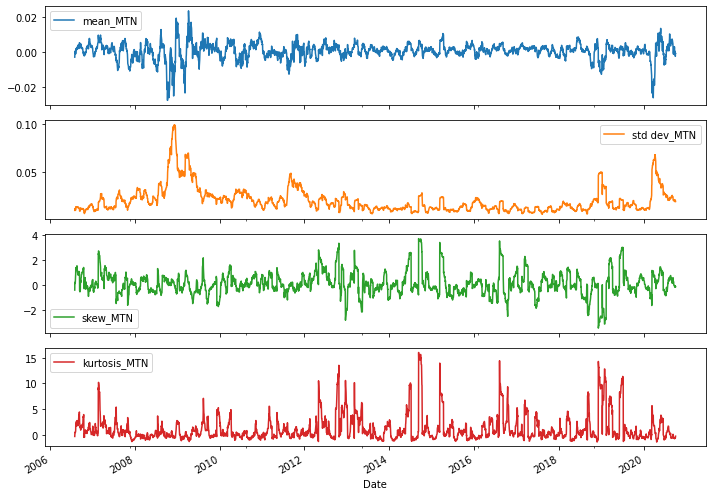

In [ ]:
w = 22
s1 = rs_mtn.rolling(w).mean()
s2 = rs_mtn.rolling(w).std()
s3 = rs_mtn.rolling(w).skew()
s4 = rs_mtn.rolling(w).kurt()

signals = pd.concat([s1, s2, s3, s4], axis=1)
signals.columns = ['mean_MTN', 'std dev_MTN', 'skew_MTN', 'kurtosis_MTN']
signals.plot(subplots=True, figsize=(10,7));
plt.tight_layout()
plt.savefig('tmp.png')

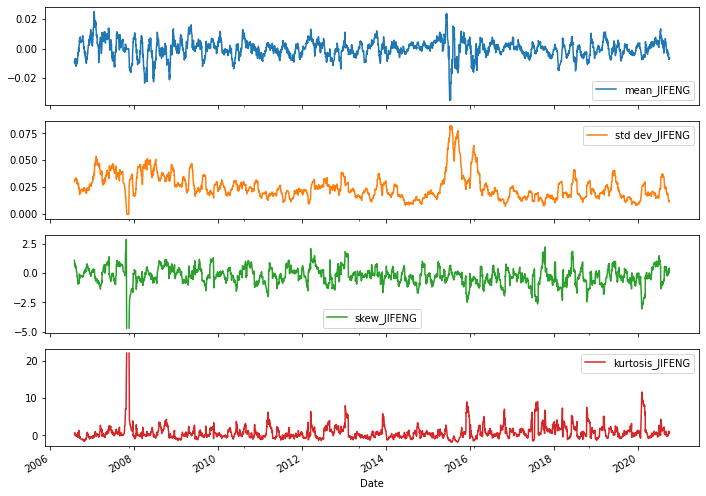

In [ ]:
w = 22
s1 = rs_Jfng.rolling(w).mean()
s2 = rs_Jfng.rolling(w).std()
s3 = rs_Jfng.rolling(w).skew()
s4 = rs_Jfng.rolling(w).kurt()

signals = pd.concat([s1, s2, s3, s4], axis=1)
signals.columns = ['mean_JIFENG', 'std dev_JIFENG', 'skew_JIFENG', 'kurtosis_JIFENG']
signals.plot(subplots=True, figsize=(10,7));
plt.tight_layout()
plt.savefig('tmp.png')

#  plot of volumes of dialy traded stock over the past decades

Populating the interactive namespace from numpy and matplotlib


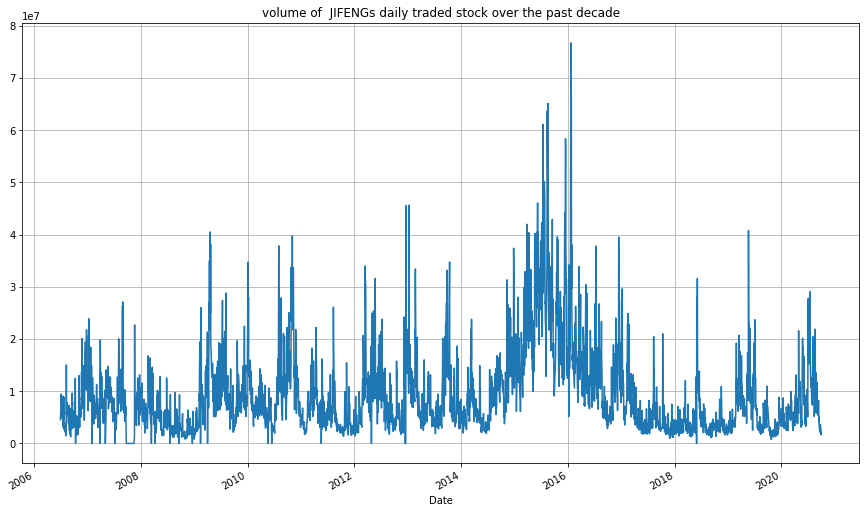

In [ ]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
Jifeng['Volume'].plot(title='volume of  JIFENGs daily traded stock over the past decade',grid = True) # Plot the volume of jfng

Populating the interactive namespace from numpy and matplotlib


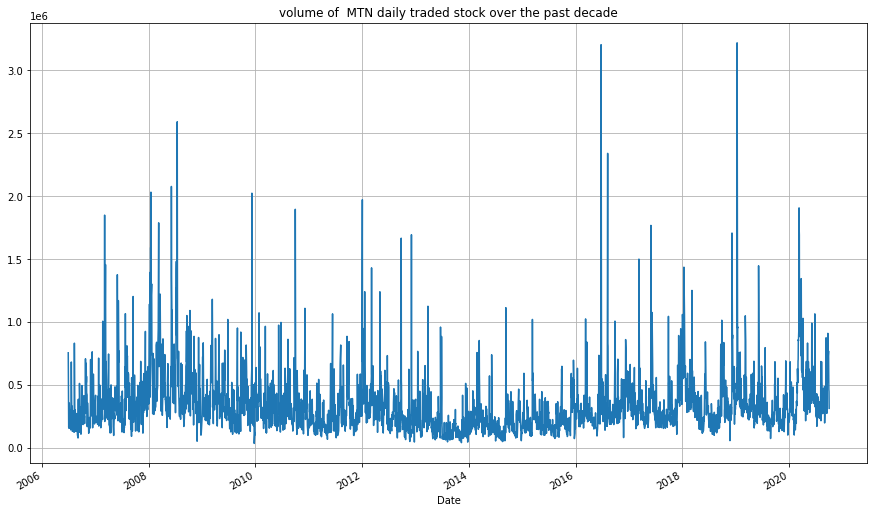

In [ ]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
mtn['Volume'].plot(title='volume of  MTN daily traded stock over the past decade',grid = True) # Plot the volume of MTN

# Correlation of our data features


In [ ]:
corr_mtn = mtn.corr(method='pearson', )
corr_mtn

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999788,0.999756,0.999593,0.998499,0.024013
High,0.999788,1.000000,0.999628,0.999771,0.998916,0.030613
Low,0.999756,0.999628,1.000000,0.999809,0.998442,0.017486
Close,0.999593,0.999771,0.999809,1.000000,0.998891,0.023650
Adj Close,0.998499,0.998916,0.998442,0.998891,1.000000,0.031036
Volume,0.024013,0.030613,0.017486,0.023650,0.031036,1.000000


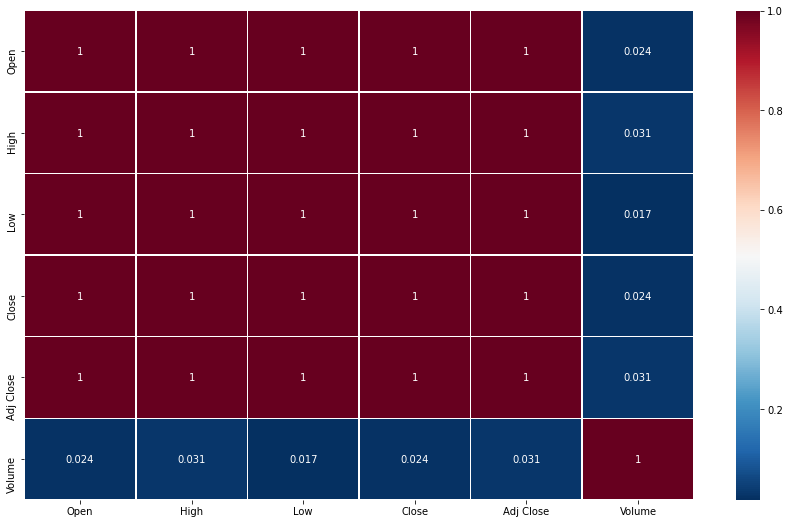

In [ ]:
import seaborn as sb
sb.heatmap(corr_mtn,xticklabels=corr_mtn.columns, yticklabels=corr_mtn.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

In [ ]:
corr_Jfng = mtn.corr(method='pearson', )
corr_Jfng

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999788,0.999756,0.999593,0.998499,0.024013
High,0.999788,1.000000,0.999628,0.999771,0.998916,0.030613
Low,0.999756,0.999628,1.000000,0.999809,0.998442,0.017486
Close,0.999593,0.999771,0.999809,1.000000,0.998891,0.023650
Adj Close,0.998499,0.998916,0.998442,0.998891,1.000000,0.031036
Volume,0.024013,0.030613,0.017486,0.023650,0.031036,1.000000


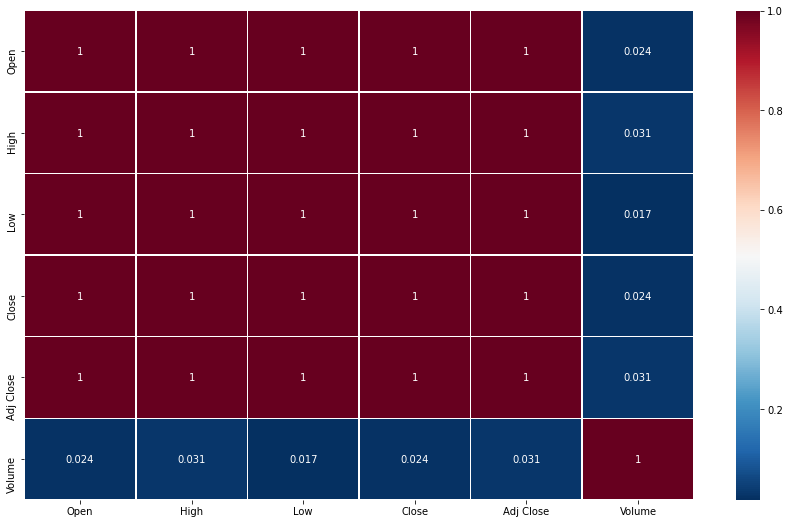

In [ ]:
import seaborn as sb
sb.heatmap(corr_Jfng,xticklabels=corr_Jfng.columns, yticklabels=corr_Jfng.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

# Assesing the visual comparison of dependent varriable againt the independent varriables 

## *MTN*

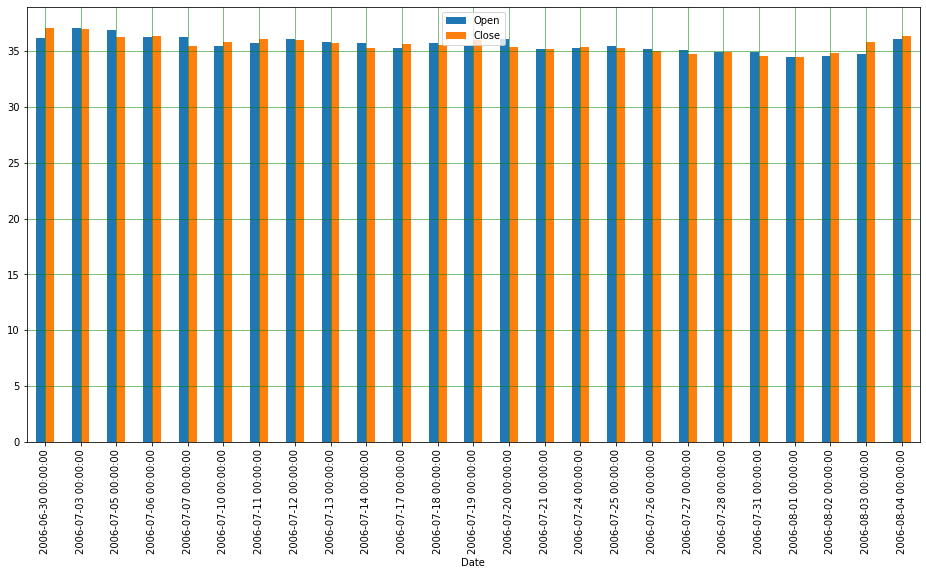

In [ ]:
#Plot Open vs Close
mtn[['Open','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

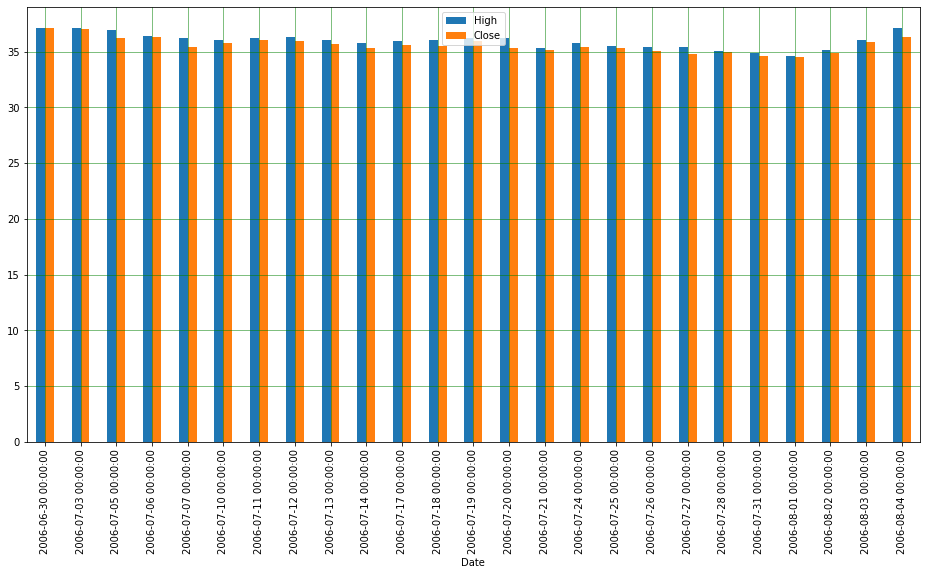

In [ ]:
#Plot High vs Close
mtn[['High','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

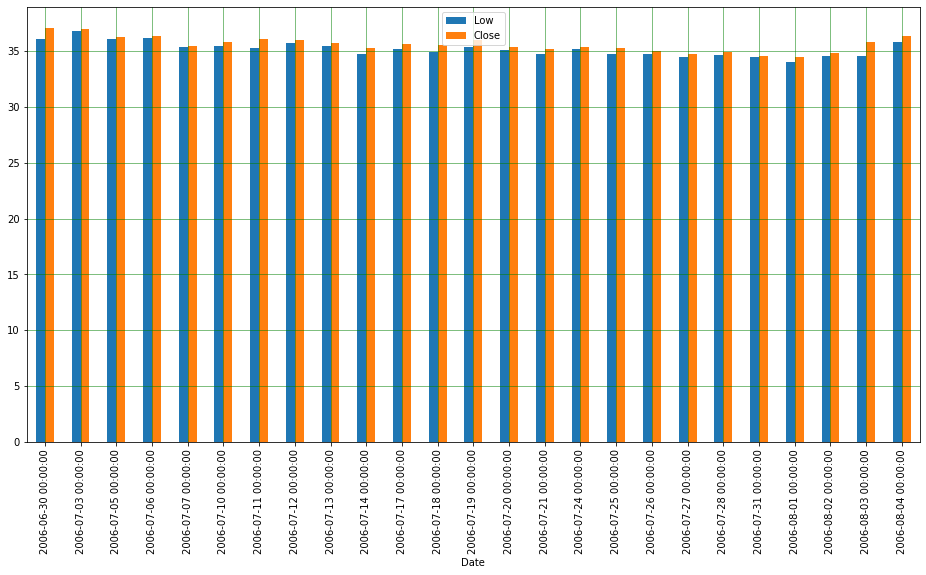

In [ ]:
#Plot Low vs  Close
mtn[['Low','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## *JIFENG*

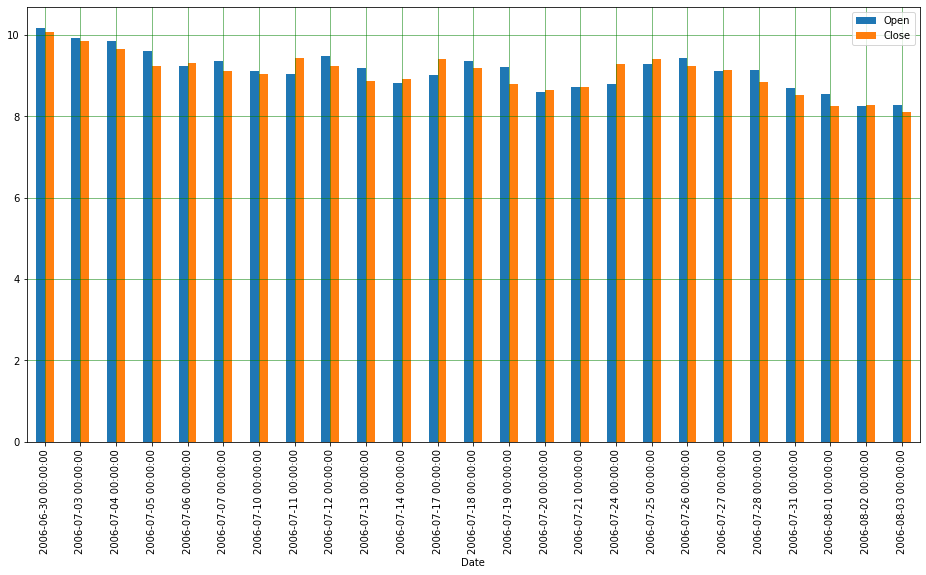

In [ ]:
#Plot Open vs Close
Jifeng[['Open','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

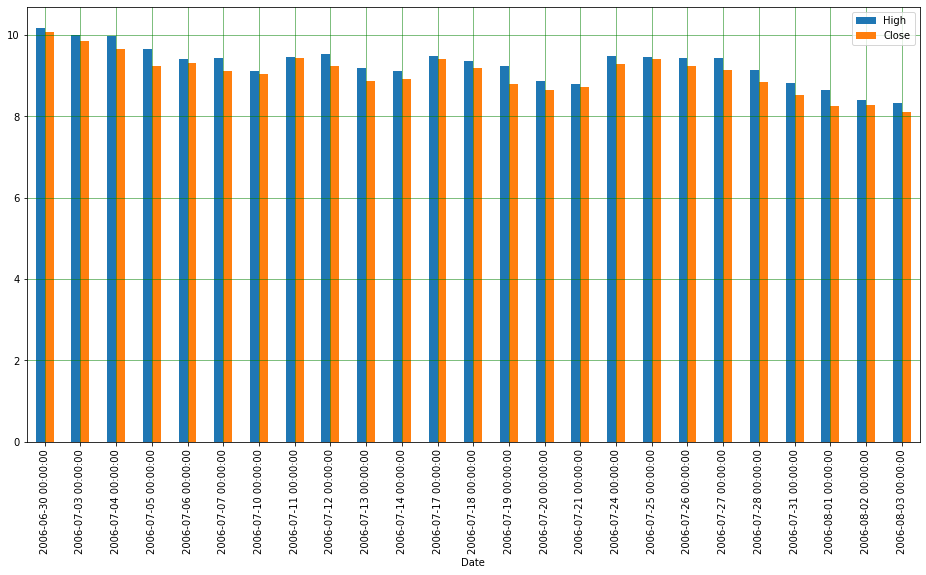

In [ ]:
#Plot High vs Close
Jifeng[['High','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

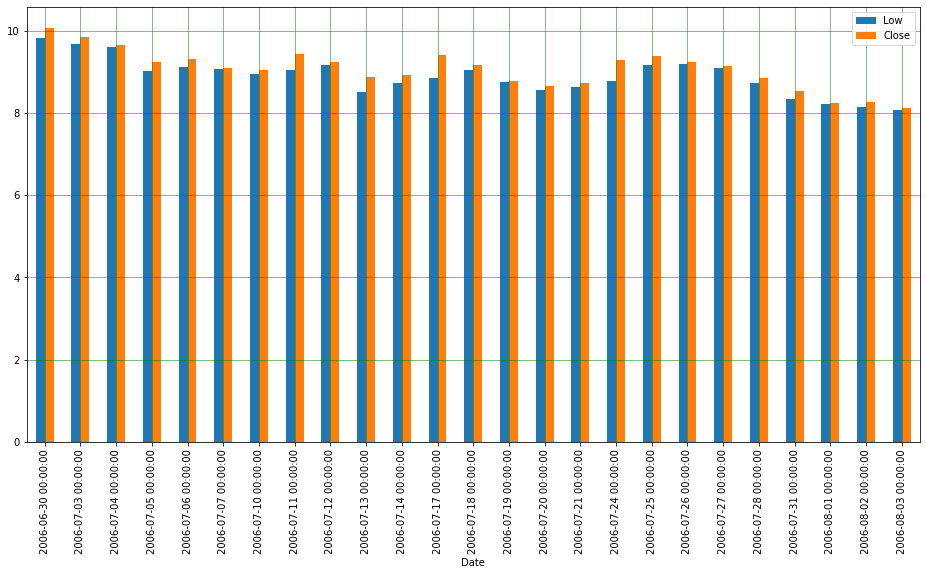

In [ ]:
#Plot Low vs  Close
Jifeng[['Low','Close']].head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# REGRESSION MODELS USING ML APPROACH
using Machine Learning we are going to explore three difeerent techniques of regression models nameely;

i.The linear Regression model

ii. k-nearest neighbour regression model

iii. the support Vector Machine regression model

## i. The linear Regression model
The Linear regression is a model assumes that, the input variables (x) and the single output variable ( y) have a linear relationship.In other words we say the value of y can be extrapolated with a linear combination of input variables ( x) . mathematicaly the linear regression model is represented as
$y = a + bx$

where $y$ is the dependent varriable 

$x$ the independent varriable 

$a$ the $y-$ intercept on the  axis

$b$ is the slope of the line 

## ii. The k-nearest neighbour regression model

The K-nearest neighbors is a straightforward algorithm that stores every available cases and and groups new cases dependent on a similitude measure (e.g., distance functions). The use of KNN as a non parametric tool began in the 1970's in  of statistical estimation and pattern detection. As a regression model,it intuitively approximates the relation between independent variables and the continuous outcome by averaging the observations in the same neighborhood. the size of neighbourhood can be picked using cross-validationto choose the scale that minimizes the mean square error


## iii. The support Vector Machine regression model

The SVM is a data-classification algorithm for predictive analysis, which assigns new data elements to one of the labeled groups. In most instances SVM is a binary classifier; the data in question is considered to have two potential target values. as a regression model, it uses a method known as a kernel trick to convert the data and then seeks an optimal boundary between potential outputs depending on these transformations.
The SVM has three hyperparametets orthy of consideration.

#### The Kernel
A kernel lets one find a high-dimensional hyperplane without increasing computing costs.In general, the expense of processing increases as the data dimension increases.

#### The Hyperplane
This is basically a line that isolate between two data classes in SVM. But this is the line that will be used to estimate the continuous performance in Support Vector Regression,

#### The Decision boundary
A judgment limit can be regarded as a demarcation line with positive instance lieing on one side and the other side lies the negative instance. on the very same line, the instances can be categorized as either positive or negative. The same concept of SVM will also be applied to support vector regression.

In [ ]:
# setting the date column as indx
mtn['Date'] = mtn.index
Jifeng['Date'] = Jifeng.index 

## *MODELING MTN*

In [ ]:
#preparing the dataset to work with 
mtn=mtn[['Date','High','Open','Low','Close']]
mtn.head(10)

,Date,High,Open,Low,Close
Date,,,,,
2006-06-30,2006-06-30,37.099998,36.200001,36.049999,37.099998
2006-07-03,2006-07-03,37.150002,37.049999,36.770000,37.000000
2006-07-05,2006-07-05,36.970001,36.930000,36.119999,36.259998
2006-07-06,2006-07-06,36.410000,36.290001,36.200001,36.349998
2006-07-07,2006-07-07,36.220001,36.220001,35.369999,35.450001
2006-07-10,2006-07-10,36.000000,35.450001,35.430000,35.799999
2006-07-11,2006-07-11,36.200001,35.700001,35.310001,36.060001
2006-07-12,2006-07-12,36.270000,36.099998,35.730000,35.980000
2006-07-13,2006-07-13,36.060001,35.840000,35.419998,35.680000


In [ ]:
#Model training and testing

#Date format is DateTime and it will throw error while training so I have created seperate month, year and date entities
mtn['Year']=mtn['Date'].dt.year
mtn['Month']=mtn['Date'].dt.month
mtn['Day']=mtn['Date'].dt.day

In [ ]:
# creating the final dataset for modelling
mtn=mtn[['Day','Month','Year','High','Open','Low','Close']]
mtn.head(10)

,Day,Month,Year,High,Open,Low,Close
Date,,,,,,,
2006-06-30,30,6,2006,37.099998,36.200001,36.049999,37.099998
2006-07-03,3,7,2006,37.150002,37.049999,36.770000,37.000000
2006-07-05,5,7,2006,36.970001,36.930000,36.119999,36.259998
2006-07-06,6,7,2006,36.410000,36.290001,36.200001,36.349998
2006-07-07,7,7,2006,36.220001,36.220001,35.369999,35.450001
2006-07-10,10,7,2006,36.000000,35.450001,35.430000,35.799999
2006-07-11,11,7,2006,36.200001,35.700001,35.310001,36.060001
2006-07-12,12,7,2006,36.270000,36.099998,35.730000,35.980000
2006-07-13,13,7,2006,36.060001,35.840000,35.419998,35.680000


the dataset above is the final dataset we av preared for our regression models

In [ ]:
#separate Independent and dependent variable
X = mtn.iloc[:,mtn.columns !='Close']
Y= mtn.iloc[:, 5]

print(X.shape) 
print(Y.shape) 

(3590, 6)
(3590,)


In [ ]:
# tain and test splitting of the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [ ]:
print(x_train.shape)
print(x_test.shape)  
print(y_train.shape)
print(y_test.shape) 

# we now aim to evaluate y_test with y_pred for Differeent Regression models


(2692, 6)
(898, 6)
(2692,)
(898,)


# RGRESSION MODEL 1: The Linear Regression

In [ ]:
#testing and training of the linear regression model

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lr_model.predict(x_test)

In [ ]:
#cross validation of linear model
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.99828119253007


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


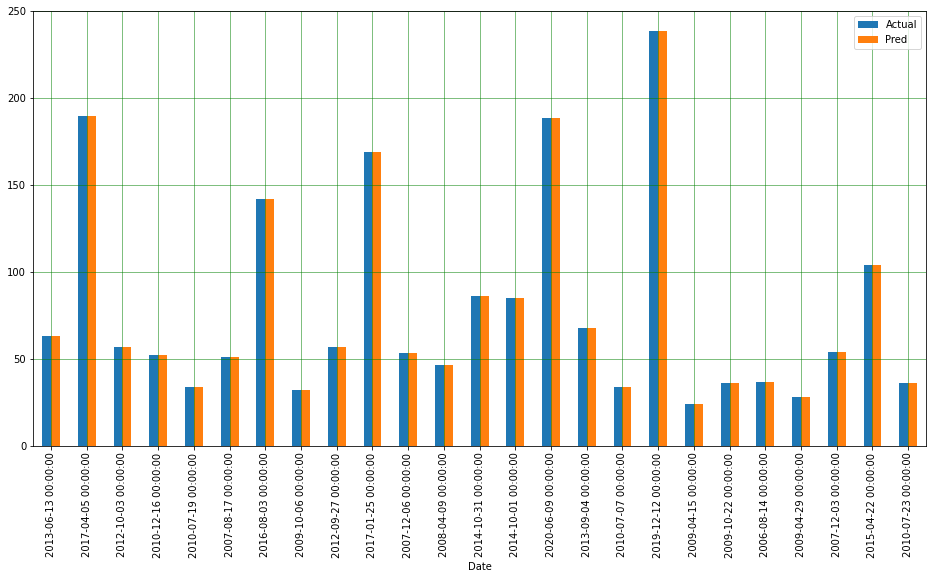

In [ ]:
plot_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_df.head(25).plot(kind='bar',figsize=(16,8), title='')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the diagram above, it could be concluded that our model have a good prediction as we ompare it to the actual data 

# RGRESSION MODEL 2: The K-nearest neighbor Regression Model (KNN)

In [ ]:
# knn Model training and testing
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

In [ ]:
# cross-validation of knn
knn_kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.95813600733845


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


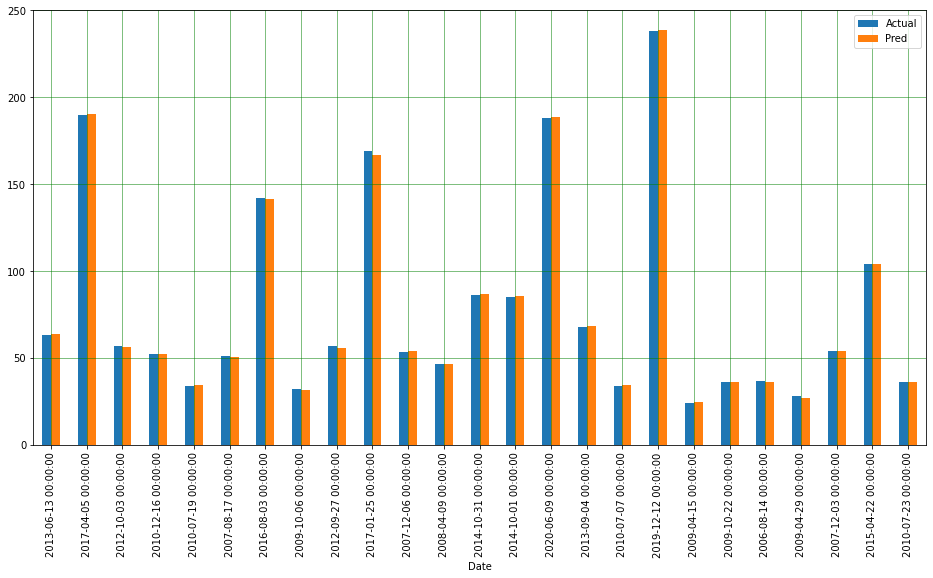

In [ ]:
#plot 
plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

the  Knn isalso a good prediction model with just an infinitesimal difference between predictions of our model and actual dataset

# REGRESSION MODEL 3: The Support Vector Machine Regression Model (SVM)

In [ ]:
# svm Model training and testing
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)

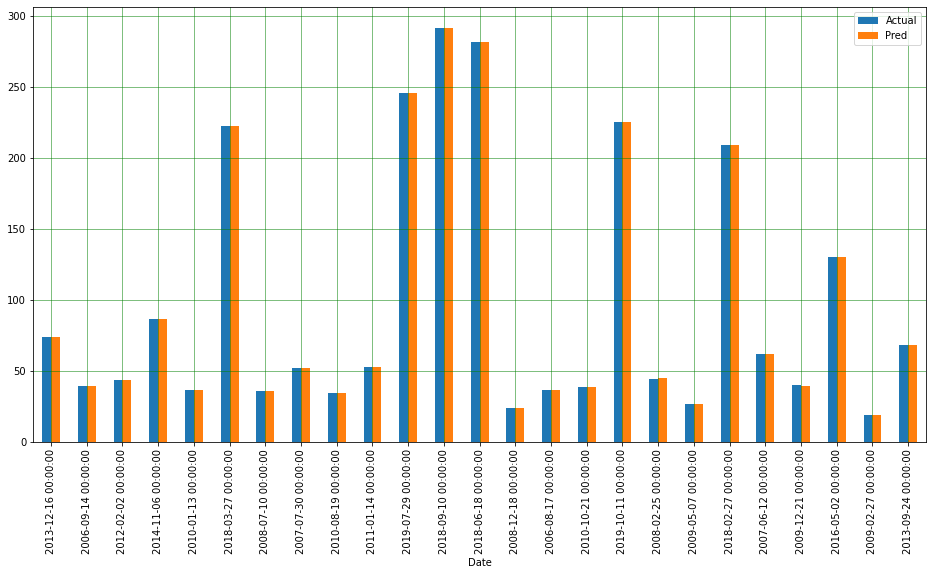

In [ ]:
plot_svm_df=pd.DataFrame({'Actual':y_test,'Pred':y_svm_pred})
plot_svm_df.head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

the SVM predicts our model perfrctly as visualized from the graph above

# TEST STATISTICS FOR MODELLING 

## RMSE (Root Mean Square Error)

The root mean of the square error (RMSE) is the square root of the square mean of the whole error. The use of RMSE is very common, and for numerical forecasts, it is considered an excellent general-purpose error metric. They are a measure of how far data points are from the regression. Or in simple terms how concentrated the data points are around the best fit line.

$RMSE = \sqrt{\frac{1}{n}\Sigma^n_{i=1}(S_i - O_i)^2}$



In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [ ]:
lr_mse=math.sqrt(mean_squared_error(y_test,y_pred))
print('Linear Model Root mean square error',lr_mse)

knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error',knn_mse)

svm_mse=math.sqrt(mean_squared_error(y_test,y_svm_pred))
print('SVM Model Root mean square error SVM',svm_mse)

Linear Model Root mean square error 1.7577599767045707e-14
KNN Model Root mean square error 1.0013305843613831
SVM Model Root mean square error SVM 0.03679421800249008


In [ ]:
print('Linear R2: ', r2_score(y_test, y_pred))
print('KNN R2: ', r2_score(y_test, y_knn_pred))
print('SVM R2: ', r2_score(y_test, y_svm_pred))

Linear R2:  1.0
KNN R2:  0.9998231837957683
SVM R2:  0.9999997612594144






MODELING JIFENG


In [ ]:
#preparing the dataset to work with 
Jifeng=Jifeng[['Date','High','Open','Low','Close']]
Jifeng.head(10)

,Date,High,Open,Low,Close
Date,,,,,
2006-06-30,2006-06-30,10.17950,10.17950,9.81410,10.07690
2006-07-03,2006-07-03,10.00000,9.92949,9.67949,9.85256
2006-07-04,2006-07-04,9.96154,9.83974,9.61538,9.65385
2006-07-05,2006-07-05,9.64744,9.61538,9.01923,9.23077
2006-07-06,2006-07-06,9.40385,9.22436,9.11538,9.32051
2006-07-07,2006-07-07,9.44231,9.35897,9.07051,9.10256
2006-07-10,2006-07-10,9.10256,9.10256,8.94231,9.04487
2006-07-11,2006-07-11,9.44872,9.05128,9.05128,9.43590
2006-07-12,2006-07-12,9.51923,9.49359,9.17949,9.23077


In [ ]:
#Model training and testing

#Date format is DateTime and it will throw error while training so I have created seperate month, year and date entities
Jifeng['Year']=Jifeng['Date'].dt.year
Jifeng['Month']=Jifeng['Date'].dt.month
Jifeng['Day']=Jifeng['Date'].dt.day

In [ ]:
# creating the final Jifeng dataset for modelling
Jifeng=Jifeng[['Day','Month','Year','High','Open','Low','Close']]
Jifeng.head(10)

,Day,Month,Year,High,Open,Low,Close
Date,,,,,,,
2006-06-30,30,6,2006,10.17950,10.17950,9.81410,10.07690
2006-07-03,3,7,2006,10.00000,9.92949,9.67949,9.85256
2006-07-04,4,7,2006,9.96154,9.83974,9.61538,9.65385
2006-07-05,5,7,2006,9.64744,9.61538,9.01923,9.23077
2006-07-06,6,7,2006,9.40385,9.22436,9.11538,9.32051
2006-07-07,7,7,2006,9.44231,9.35897,9.07051,9.10256
2006-07-10,10,7,2006,9.10256,9.10256,8.94231,9.04487
2006-07-11,11,7,2006,9.44872,9.05128,9.05128,9.43590
2006-07-12,12,7,2006,9.51923,9.49359,9.17949,9.23077


In [ ]:
#separate Independent and dependent variable
X = Jifeng.iloc[:,mtn.columns !='Close']
Y= Jifeng.iloc[:, 5]

print(X.shape) 
print(Y.shape) 

(3473, 6)
(3473,)


In [ ]:
# tain and test splitting of the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

print(x_train.shape)
print(x_test.shape)  
print(y_train.shape)
print(y_test.shape) 

# we now aim to evaluate y_test with y_pred for Differeent Regression models

(2604, 6)
(869, 6)
(2604,)
(869,)


# RGRESSION MODEL 1: The Linear Regression

In [ ]:
#testing and training of the linear regression model

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lr_model.predict(x_test)

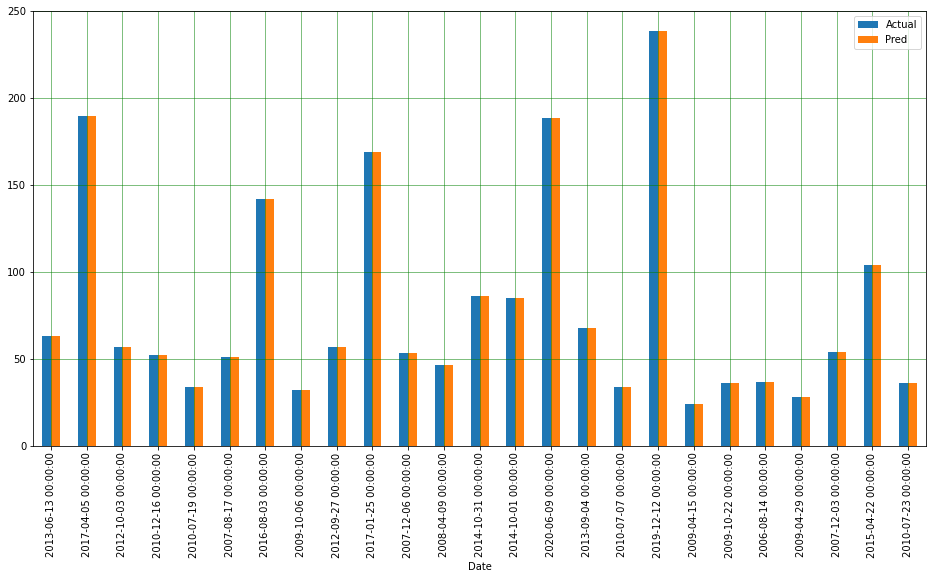

In [ ]:
Plot_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_df.head(25).plot(kind='bar',figsize=(16,8), title='')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# RGRESSION MODEL 2: The K-nearest neighbor Regression Model (KNN)

In [ ]:
# knn Model training and testing
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

In [ ]:
# cross-validation of knn
knn_kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  97.34378495384405


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


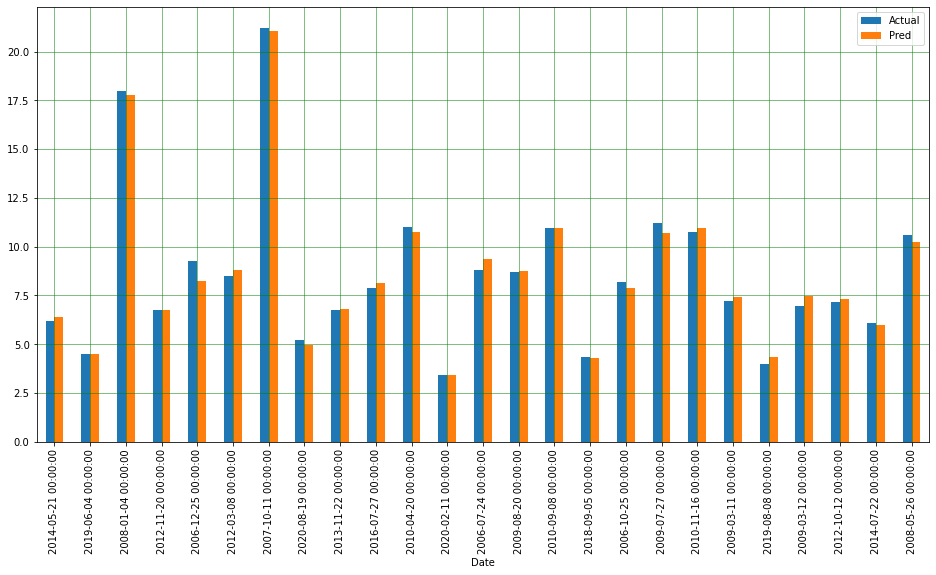

In [ ]:
#plot 
plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

REGRESSION MODEL 3: The Support Vector Machine Regression Model (SVM)

In [ ]:
# svm Model training and testing
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)

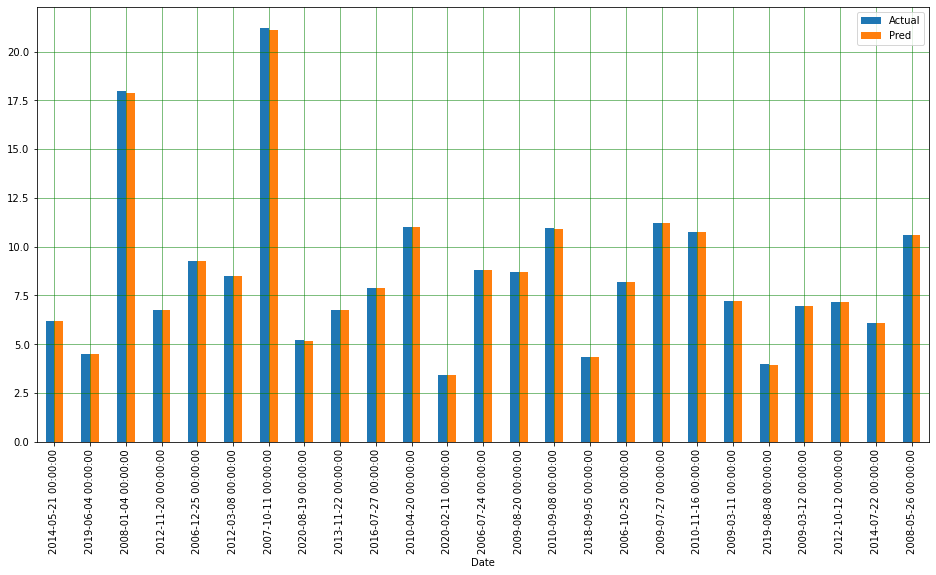

In [ ]:
plot_svm_df=pd.DataFrame({'Actual':y_test,'Pred':y_svm_pred})
plot_svm_df.head(25).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# TEST STATISTICS FOR JIFENG ML-REGRESSION MODELS

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [ ]:
lr_mse=math.sqrt(mean_squared_error(y_test,y_pred))
print('Linear Model Root mean square error',lr_mse)

knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error',knn_mse)

svm_mse=math.sqrt(mean_squared_error(y_test,y_svm_pred))
print('SVM Model Root mean square error SVM',svm_mse)

Linear Model Root mean square error 6.661951361242779e-15
KNN Model Root mean square error 0.28040410367745694
SVM Model Root mean square error SVM 0.02689172496468494


In [ ]:
print('Linear R2: ', r2_score(y_test, y_pred))
print('KNN R2: ', r2_score(y_test, y_knn_pred))
print('SVM R2: ', r2_score(y_test, y_svm_pred))

Linear R2:  1.0
KNN R2:  0.9936981874424791
SVM R2:  0.9999420392398427


# TIME SERIES MODELLING

In [ ]:
# importing necessary libaries for modelling 
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl

import yfinance as yf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#defining timeseries plot functions
def tsplot(y, lags=None, figsize=(10,8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
                      
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
        
        plt.tight_layout()
    return

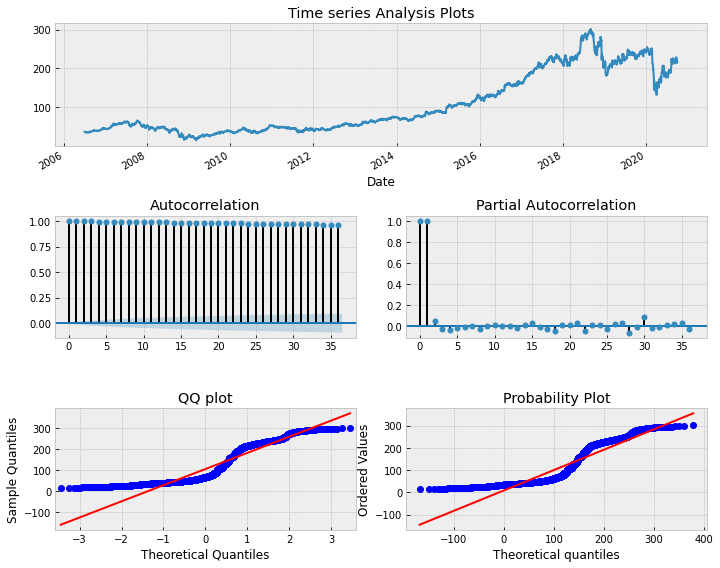

In [ ]:

tsplot(mtn['Close'])


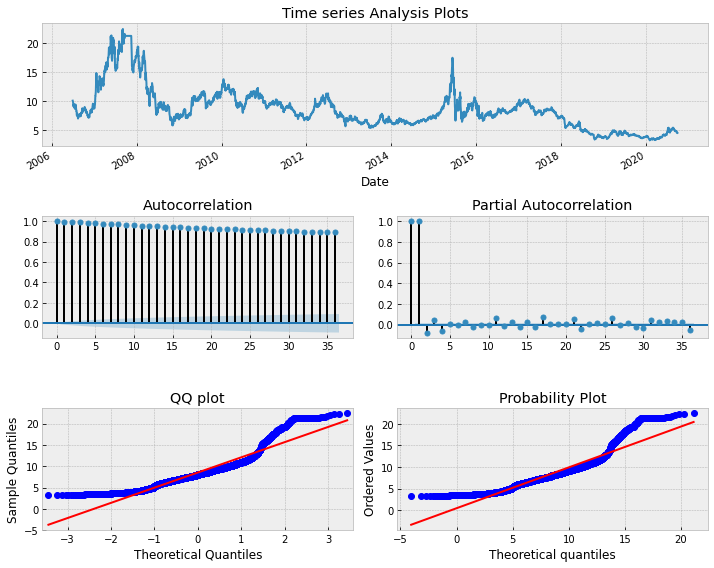

In [ ]:
tsplot(Jifeng['Close'])

In [ ]:
from scipy import stats

# computing and printing Jarque bera test
print('Test Statistics (Jarque-Bera):')
print('MTN:', stats.jarque_bera(mtn['Close']))
print('JIFENG:', stats.jarque_bera(Jifeng['Close']))


Test Statistics (Jarque-Bera):
MTN: (508.77416464325773, 0.0)
JIFENG: (2141.5634330749203, 0.0)


The Jarque Bera test statistic for MTN and JIFENG Close Price reads 508.77416464325773 and 2141.5634330749203 with both p value less than 0.05 (i.e. 0). we thus reject the null hypothesis that both our dataset are not normally distributed. in other words we conclude that thedeparture from normality as measures by the test statistics is statistically significant.

# Autoregressive Conditionally Heteroskedastic Models - ARCH(p)

# Autoregressive Conditionally Heteroskedastic Models - ARCH(p) for MTN and JIFENG Close price

We will model the volatility of MTN and JIFENG close price. We have to know that as financial engineers, we want to find out the stationarity of the close price(s) to be able to know the right Statistical characteristics associated with it decision to take. We already know from the previous test that the Close prices tested negative to Bera-Jarque test. Which means it is not normally distributed.

#### ARCH Model 
ARCH(p) models is known as an AR(p) model applied to the variance of a time series. Another way to think about it, is that the variance of our time series NOW at time t, is conditional on past
observations of the variance in previous periods.

*MTN*


In [ ]:
model= arch_model(mtn['Close'], vol='Arch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 19698.09529997906
Iteration:      2,   Func. Count:     11,   Neg. LLF: 19634.603424299265
Iteration:      3,   Func. Count:     17,   Neg. LLF: 18739.179023243953
Iteration:      4,   Func. Count:     24,   Neg. LLF: 18382.105922687242
Iteration:      5,   Func. Count:     30,   Neg. LLF: 18357.169330126228
Iteration:      6,   Func. Count:     37,   Neg. LLF: 18356.1239140282
Iteration:      7,   Func. Count:     42,   Neg. LLF: 18354.601546046604
Iteration:      8,   Func. Count:     47,   Neg. LLF: 18345.037883418925
Iteration:      9,   Func. Count:     52,   Neg. LLF: 18291.404417148096
Iteration:     10,   Func. Count:     57,   Neg. LLF: 17922.586050943857
Iteration:     11,   Func. Count:     63,   Neg. LLF: 17621.211740813407
Iteration:     12,   Func. Count:     69,   Neg. LLF: 17510.574605381204
Iteration:     13,   Func. Count:     75,   Neg. LLF: 17464.57238834767
Iteration:     14,   Func. Count:     81,   Neg. LLF: 1

__ARCH(1) model of MTN__

$$r_{t}=   44.9083+\epsilon_{t}$$

$$var(y_t|y_{t-1}) = \sigma^{2}_{t}= 0.9670 + 0.9972y^2_{t-1}$$

$$y_{t} = \sigma_{t}\epsilon_{t}, \epsilon_{t} \sim~ N(0,1)$$


*JIFENG*

In [ ]:
model= arch_model(Jifeng['Close'], vol='Arch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7277.47476761528
Iteration:      2,   Func. Count:     13,   Neg. LLF: 7200.606766861269
Iteration:      3,   Func. Count:     19,   Neg. LLF: 7144.556681141663
Iteration:      4,   Func. Count:     25,   Neg. LLF: 7099.567283409919
Iteration:      5,   Func. Count:     31,   Neg. LLF: 7059.8262804021215
Iteration:      6,   Func. Count:     37,   Neg. LLF: 7022.715894828332
Iteration:      7,   Func. Count:     42,   Neg. LLF: 6671.189414688828
Iteration:      8,   Func. Count:     48,   Neg. LLF: 6647.647802741636
Iteration:      9,   Func. Count:     54,   Neg. LLF: 6625.160037439806
Iteration:     10,   Func. Count:     60,   Neg. LLF: 6604.212773340715
Iteration:     11,   Func. Count:     66,   Neg. LLF: 6587.999454756713
Iteration:     12,   Func. Count:     72,   Neg. LLF: 6580.627447337731
Iteration:     13,   Func. Count:     79,   Neg. LLF: 6575.060549299786
Iteration:     14,   Func. Count:     85,   Neg. LLF: 6553.06552

__ARCH(1) model of JIFENG__

$$r_{t}=   7.5776+\epsilon_{t}$$

$$var(y_t|y_{t-1}) = \sigma^{2}_{t}= 0.326 + y^2_{t-1}$$

$$y_{t} = \sigma_{t}\epsilon_{t}, \epsilon_{t} \sim~ N(0,1)$$


### Generalized Autoregressive Conditionally Heteroskedastic Models - GARCH(p,q)

Let us see what Garch has for us and the difference compared to ARCH. For GARCH, (p, q) is an ARMA model applied to the variance of a time series i.e., it has an autoregressive AR(p) term and MA (q) terms. The MA(q) portion models the variance of the process. The basic GARCH(1, 1) formula is: 


# WHY GARCH FOR ANALYSIS
Omega is how the variance would be if information about past variances were not being passed to the model. So, omega is the baseline variance for the model. The square-root of omega would be the standard deviation in returns.


### CONCLUSIONS

In [ ]:
model= arch_model(mtn['Close'], vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 19689.170624187987
Iteration:      2,   Func. Count:     14,   Neg. LLF: 19648.205658591796
Iteration:      3,   Func. Count:     22,   Neg. LLF: 18188.586117666324
Iteration:      4,   Func. Count:     30,   Neg. LLF: 18067.986540983344
Iteration:      5,   Func. Count:     36,   Neg. LLF: 17540.63482526043
Iteration:      6,   Func. Count:     42,   Neg. LLF: 17513.116106807807
Iteration:      7,   Func. Count:     48,   Neg. LLF: 17448.145372676503
Iteration:      8,   Func. Count:     54,   Neg. LLF: 17426.75723908561
Iteration:      9,   Func. Count:     60,   Neg. LLF: 17313.259085401565
Iteration:     10,   Func. Count:     67,   Neg. LLF: 17252.926893820066
Iteration:     11,   Func. Count:     74,   Neg. LLF: 17216.189083249603
Iteration:     12,   Func. Count:     81,   Neg. LLF: 17180.88737165878
Iteration:     13,   Func. Count:     88,   Neg. LLF: 17003.68150315457
Iteration:     14,   Func. Count:     95,   Neg. LLF: 1

In [ ]:

model= arch_model(Jifeng['Close'], vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary)



Iteration:      1,   Func. Count:      6,   Neg. LLF: 7300.240353506595
Iteration:      2,   Func. Count:     15,   Neg. LLF: 7215.818101043382
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7096.815514315369
Iteration:      4,   Func. Count:     30,   Neg. LLF: 7057.807515241843
Iteration:      5,   Func. Count:     37,   Neg. LLF: 6932.10188543038
Iteration:      6,   Func. Count:     44,   Neg. LLF: 6892.488680551512
Iteration:      7,   Func. Count:     51,   Neg. LLF: 6681.998522225389
Iteration:      8,   Func. Count:     58,   Neg. LLF: 6651.343251957594
Iteration:      9,   Func. Count:     65,   Neg. LLF: 6622.1471281087215
Iteration:     10,   Func. Count:     72,   Neg. LLF: 6609.646546109884
Iteration:     11,   Func. Count:     79,   Neg. LLF: 6597.415795556475
Iteration:     12,   Func. Count:     86,   Neg. LLF: 6587.833008127243
Iteration:     13,   Func. Count:     93,   Neg. LLF: 6579.603701467336
Iteration:     14,   Func. Count:    100,   Neg. LLF: 6572.82949

__GARCH(1,1) model of JIFENG__
$$r_{t}=   7.5622+\epsilon_{t}$$

$$var(y_t|y_{t-1}) = \sigma^{2}_{t}= 0.0243 + 0.9026y^2_{t-1} + 0.0974\sigma^{2}_{t-1}$$

$$y_{t} = \sigma_{t}\epsilon_{t}, \epsilon_{t} \sim~ N(0,1)$$
